In [1]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "E:/Project/dataset/train/" # provide the path of your training or testing dataset

In [3]:
CATEGORIES = ["Basket", "Coin", "Figure"] # change it to your categories

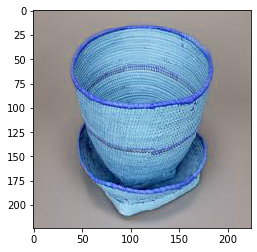

In [4]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path 
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        #convert to array and for color change it to cv2.IMREAD_COLOR
        
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array)

[[[157 146 142]
  [157 146 142]
  [157 146 142]
  ...
  [160 151 147]
  [160 151 147]
  [160 151 147]]

 [[157 146 142]
  [157 146 142]
  [157 146 142]
  ...
  [160 151 147]
  [160 151 147]
  [160 151 147]]

 [[157 146 142]
  [157 146 142]
  [157 146 142]
  ...
  [160 151 147]
  [160 151 147]
  [160 151 147]]

 ...

 [[162 153 150]
  [163 154 151]
  [164 155 152]
  ...
  [166 157 154]
  [166 157 154]
  [166 157 154]]

 [[162 153 150]
  [163 154 151]
  [164 155 152]
  ...
  [166 157 154]
  [166 157 154]
  [166 157 154]]

 [[162 153 150]
  [163 154 151]
  [164 155 152]
  ...
  [166 157 154]
  [166 157 154]
  [166 157 154]]]


In [6]:
print(img_array.shape)

(224, 224, 3)


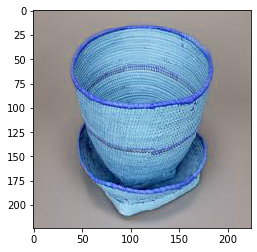

In [7]:
IMG_SIZE = 224 # change to the desired image size 

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap=None)
plt.show()

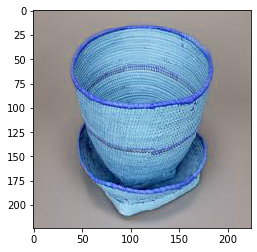

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap=None)
plt.show()

In [9]:
training_data = [] # same process for test data just change the variables wherever required

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  # create path to your dataset
        class_num = CATEGORIES.index(category)  # get the classification  

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  #convert to array and for color change it to cv2.IMREAD_COLOR
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 820.24it/s]

3000


In [10]:
train_images = []
train_labels = []

for features,label in training_data:
    train_images.append(features)
    train_labels.append(label)

print(train_images[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[146]
   [146]
   [146]
   ...
   [151]
   [151]
   [151]]

  [[146]
   [146]
   [146]
   ...
   [151]
   [151]
   [151]]

  [[146]
   [146]
   [146]
   ...
   [151]
   [151]
   [151]]

  ...

  [[153]
   [154]
   [155]
   ...
   [157]
   [157]
   [157]]

  [[153]
   [154]
   [155]
   ...
   [157]
   [157]
   [157]]

  [[153]
   [154]
   [155]
   ...
   [157]
   [157]
   [157]]]]


In [11]:
import pickle

pickle_out = open("train_images.pickle","wb")
pickle.dump(train_images, pickle_out)
pickle_out.close()

pickle_out = open("train_labels.pickle","wb")
pickle.dump(train_labels, pickle_out)
pickle_out.close()

In [12]:
train_images.shape

(3000, 224, 224, 1)